In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import json
import numpy as np
from scipy import signal


In [2]:
# EXPERIMENT_DIR = '/home/ubuntu/experiments/dwm-test'
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test'


In [3]:
MAPPING_FILE_NAME = "{}/recalibrated-percolator-output/percolator-idx-mapping.csv".format(EXPERIMENT_DIR)

# determine the mapping between the percolator index and the run file name
def get_percolator_run_mapping(mapping_file_name):
    df = pd.read_csv(mapping_file_name)
    mapping_l = [tuple(r) for r in df.to_numpy()]
    return mapping_l

def file_idx_for_run(run_name):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[1] == run_name:
            result = m[0]
            break
    return result

def run_name_for_file_idx(file_idx):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[0] == file_idx:
            result = m[1]
            break
    return result

In [ ]:
TARGET_DECOY_METRICS_DB_FILE_NAME = '{}/target-decoy-models/experiment-metrics-for-library-sequences.sqlite'.format(EXPERIMENT_DIR)

In [46]:
db_conn = sqlite3.connect(TARGET_DECOY_METRICS_DB_FILE_NAME)
target_metrics_df = pd.read_sql_query('select sequence,charge,file_idx,peak_idx,target_metrics from extracted_metrics', db_conn)
db_conn.close()

In [47]:
# unpack the target metrics from each sequence
metrics = []
metric_names = [key for key in sorted(json.loads(target_metrics_df.iloc[0].target_metrics))]

for row in sequences_df.itertuples():
    # target metric values
    d = json.loads(row.target_metrics)
    if ((d is not None) and (isinstance(d, dict))):
        l = []
        l.append(row.sequence)
        l.append(row.charge)
        l.append(row.file_idx)
        l.append(int(row.peak_idx))
        l += [d[key] for key in sorted(d)]
        metrics.append(tuple(l))

# create a dataframe with the expanded metrics
columns = ['sequence','charge','file_idx','peak_idx']
columns += metric_names
metrics_df = pd.DataFrame(metrics, columns=columns)

target_metrics_df = pd.merge(target_metrics_df, metrics_df, how='left', left_on=['sequence','charge','file_idx','peak_idx'], right_on=['sequence','charge','file_idx','peak_idx'])


In [49]:
target_metrics_df.drop('target_metrics', axis=1, inplace=True)


In [50]:
target_metrics_df.columns

Index(['sequence', 'charge', 'file_idx', 'peak_idx', 'delta_mz_ppm',
       'delta_rt', 'delta_scan', 'fwhm_rt_0', 'fwhm_scan_0',
       'geometric_mean_0_1', 'geometric_mean_0_1_2',
       'isotope_0_1_mz_delta_ppm', 'isotope_0_1_rt_delta',
       'isotope_0_1_scan_delta', 'isotope_0_2_mz_delta_ppm',
       'isotope_0_2_rt_delta', 'isotope_0_2_scan_delta',
       'monoisotope_auc_over_isotope_peak_auc_sum',
       'monoisotope_int_over_isotope_peak_int_sum', 'mz_delta_ppm_std_dev_0',
       'mz_delta_ppm_std_dev_1', 'number_of_frames_0', 'number_of_frames_1',
       'number_of_frames_2', 'number_of_missing_frames_0',
       'number_of_missing_frames_1', 'number_of_missing_frames_2',
       'peak_base_width_rt_0', 'peak_base_width_scan_0', 'r_squared_phr',
       'rt_isotope_correlation', 'rt_isotope_cv', 'rt_peak_symmetry_0',
       'rt_peak_symmetry_1', 'rt_peak_symmetry_2', 'scan_isotope_correlation',
       'scan_isotope_cv', 'scan_peak_symmetry_0', 'scan_peak_symmetry_1',
       '

In [52]:
db_conn = sqlite3.connect(TARGET_DECOY_METRICS_DB_FILE_NAME)
decoy_metrics_df = pd.read_sql_query('select sequence,charge,file_idx,peak_idx,decoy_metrics from extracted_metrics where decoy_metrics != \'NaN\'', db_conn)
db_conn.close()

In [53]:
# unpack the decoy metrics from each sequence
metrics = []
metric_names = [key for key in sorted(json.loads(decoy_metrics_df.iloc[0].decoy_metrics))]

for row in decoy_metrics_df.itertuples():
    # target metric values
    d = json.loads(row.decoy_metrics)
    if ((d is not None) and (isinstance(d, dict))):
        l = []
        l.append(row.sequence)
        l.append(row.charge)
        l.append(row.file_idx)
        l.append(int(row.peak_idx))
        l += [d[key] for key in sorted(d)]
        metrics.append(tuple(l))

# create a dataframe with the expanded metrics
columns = ['sequence','charge','file_idx','peak_idx']
columns += metric_names
metrics_df = pd.DataFrame(metrics, columns=columns)

decoy_metrics_df = pd.merge(decoy_metrics_df, metrics_df, how='inner', left_on=['sequence','charge','file_idx','peak_idx'], right_on=['sequence','charge','file_idx','peak_idx'])


In [54]:
decoy_metrics_df.drop('decoy_metrics', axis=1, inplace=True)


In [56]:
len(decoy_metrics_df)

47560

In [57]:
decoy_metrics_df.sample(5)

,sequence,charge,file_idx,peak_idx,delta_mz_ppm,delta_rt,delta_scan,fwhm_rt_0,fwhm_scan_0,geometric_mean_0_1,...,rt_isotope_correlation,rt_isotope_cv,rt_peak_symmetry_0,rt_peak_symmetry_1,rt_peak_symmetry_2,scan_isotope_correlation,scan_isotope_cv,scan_peak_symmetry_0,scan_peak_symmetry_1,scan_peak_symmetry_2
20722,GLPGPQGSSGPK,2,1,1.0,0.721032,0.048972,-0.110945,18.426523,7.4575,9.346267,...,0.847266,0.000000e+00,1.948018,1.917001,1.661272,0.485403,0.001986,0.278788,0.969538,0.952350
28911,AVASQLDCNFLK,2,10,0.0,2.706623,0.004352,-0.158693,2.544537,19.6250,9.191076,...,0.000000,1.418788e-03,0.865552,0.797571,0.957865,0.000000,0.020874,3.540193,0.570144,0.993289
7718,QLLVEAIDVPAGTATLGR,2,15,0.0,-1.432258,-0.002612,0.002553,2.322708,10.2050,10.552894,...,0.503284,2.898734e-04,0.853147,0.551119,0.648163,-0.087109,0.015348,1.017579,2.502793,1.466176
22097,NIFVLQQNLTNITMSR,2,1,0.0,-0.676296,-0.001960,0.030962,4.438531,4.7100,9.990656,...,0.847054,1.123975e-03,1.164870,1.143178,1.045131,-0.032820,0.056073,1.700495,2.337423,1.012690
25046,FDAHDFADQAK,2,2,0.0,3.606127,0.003891,0.049072,4.826943,5.8875,9.881210,...,0.158622,1.276076e-16,1.018296,2.421384,1.946829,0.254113,0.005467,0.125299,3.266667,1.089542


#### isotope correlation for targets and decoys

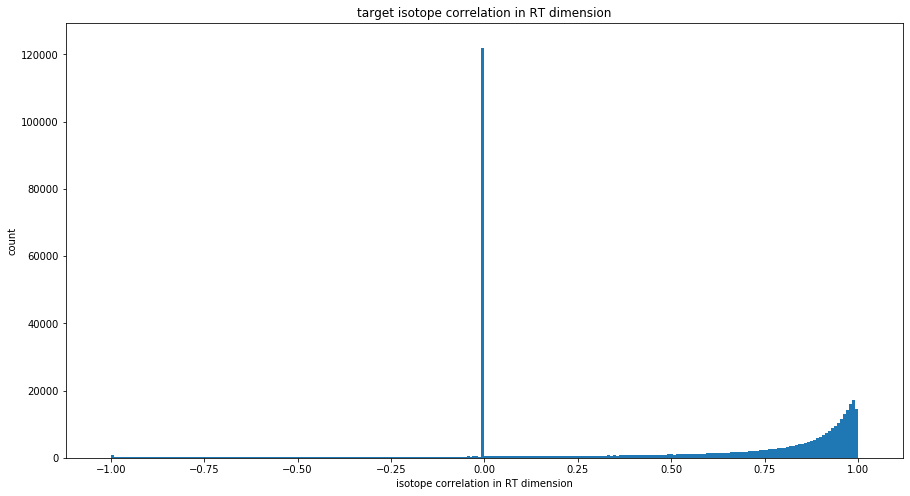

In [58]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 250
hist, bins, _ = plt.hist(target_metrics_df.rt_isotope_correlation, bins=bins)
plt.xlabel('isotope correlation in RT dimension')
plt.ylabel('count')
plt.title('target isotope correlation in RT dimension')
# ax1.set(xticks=range(-5,5), xlim=[-5, 5])

plt.show()

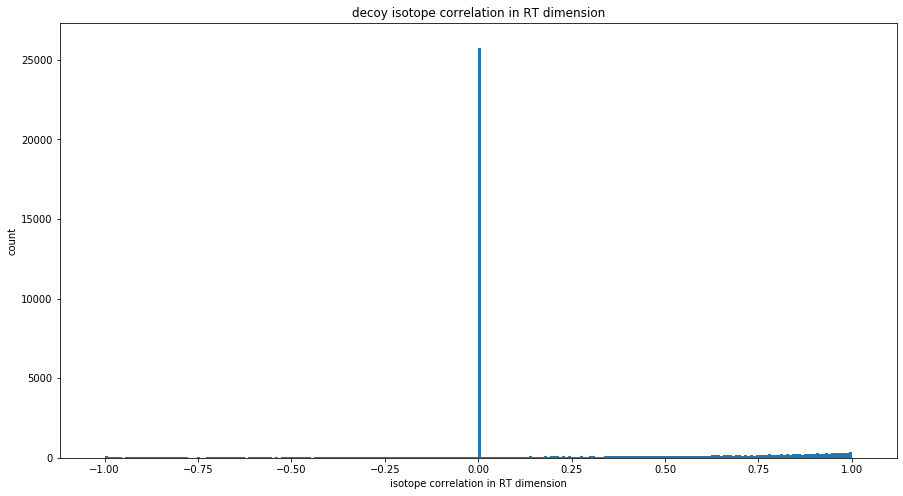

In [59]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 250
hist, bins, _ = plt.hist(decoy_metrics_df.rt_isotope_correlation, bins=bins)
plt.xlabel('isotope correlation in RT dimension')
plt.ylabel('count')
plt.title('decoy isotope correlation in RT dimension')
# ax1.set(xticks=range(-5,5), xlim=[-5, 5])

plt.show()

#### isotope apex CV for targets and decoys

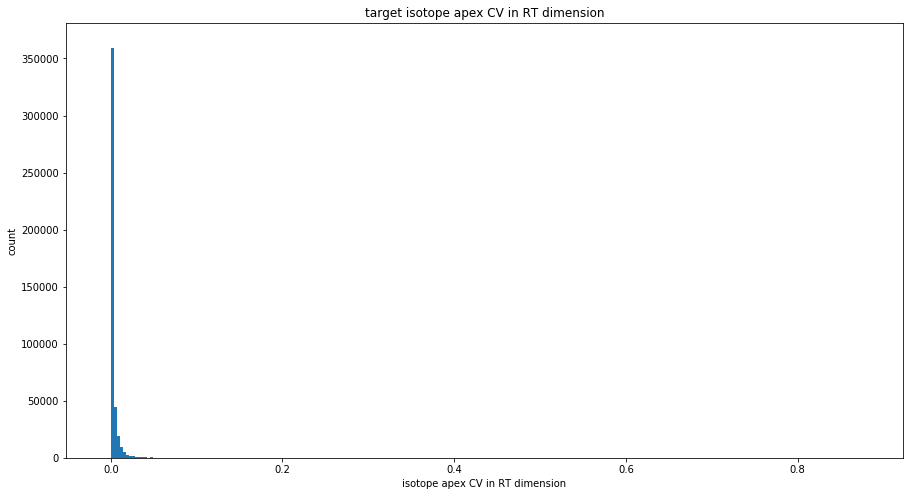

In [63]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 250
hist, bins, _ = plt.hist(target_metrics_df.rt_isotope_cv, bins=bins)
plt.xlabel('isotope apex CV in RT dimension')
plt.ylabel('count')
plt.title('target isotope apex CV in RT dimension')
# ax1.set(xticks=range(-5,5), xlim=[-5, 5])

plt.show()

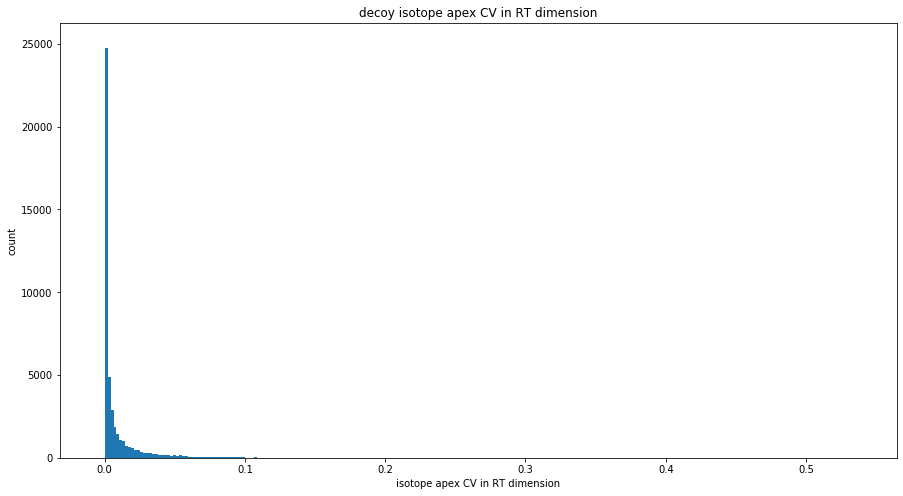

In [64]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 250
hist, bins, _ = plt.hist(decoy_metrics_df.rt_isotope_cv, bins=bins)
plt.xlabel('isotope apex CV in RT dimension')
plt.ylabel('count')
plt.title('decoy isotope apex CV in RT dimension')
# ax1.set(xticks=range(-5,5), xlim=[-5, 5])

plt.show()

In [67]:
# find a feature with high isotope correlation and low apex CV
target_metrics_df.sort_values(by=['rt_isotope_correlation'], ascending=False, inplace=True)

In [83]:
target_metrics_df[target_metrics_df.rt_isotope_cv > 0].head()

,sequence,charge,file_idx,peak_idx,delta_mz_ppm,delta_rt,delta_scan,fwhm_rt_0,fwhm_scan_0,geometric_mean_0_1,...,rt_isotope_correlation,rt_isotope_cv,rt_peak_symmetry_0,rt_peak_symmetry_1,rt_peak_symmetry_2,scan_isotope_correlation,scan_isotope_cv,scan_peak_symmetry_0,scan_peak_symmetry_1,scan_peak_symmetry_2
63924,ITEQGVHFR,2,15,0.0,0.774116,-0.001172,-0.004852,2.699842,4.3175,10.484355,...,1.0,0.002018,1.171658,1.477679,0.842795,-0.372518,0.047453,0.468153,1.766807,1.690608
21232,LCSQMEQLEQENQQLK,2,8,1.0,0.468179,0.019154,0.025270,3.383500,7.0650,12.484974,...,1.0,0.002283,0.870307,3.185246,1.086424,0.012604,0.039691,0.195652,1.786311,0.166297
39973,VNWATTPSSQK,2,8,1.0,0.118663,-0.016668,-0.071814,1.465361,10.9900,12.663415,...,1.0,0.001890,1.076628,4.925057,4.827458,-0.083681,0.002889,0.546697,0.734634,1.630252
20070,IYESHVGISSHEGK,2,8,0.0,0.621711,-0.000952,0.005376,0.829723,3.9250,9.815402,...,1.0,0.000994,2.507253,1.016580,2.461783,0.679299,0.003774,1.080463,1.128341,1.750392
46078,AQESVGIYEVTHQFVK,2,15,1.0,-0.218386,-0.006462,0.064296,1.907423,5.4950,11.017064,...,1.0,0.002905,1.495851,1.906079,2.199485,-0.149920,0.017560,1.770950,1.230146,1.529915


In [122]:
selected_sequence_s = target_metrics_df.loc[39973]
selected_sequence_s

sequence                                     VNWATTPSSQK
charge                                                 2
file_idx                                               8
peak_idx                                               1
delta_mz_ppm                                    0.118663
delta_rt                                      -0.0166683
delta_scan                                    -0.0718138
fwhm_rt_0                                        1.46536
fwhm_scan_0                                        10.99
geometric_mean_0_1                               12.6634
geometric_mean_0_1_2                             12.2598
isotope_0_1_mz_delta_ppm                        0.403942
isotope_0_1_rt_delta                          0.00151707
isotope_0_1_scan_delta                        0.00705219
isotope_0_2_mz_delta_ppm                      -0.0322276
isotope_0_2_rt_delta                          0.00455613
isotope_0_2_scan_delta                        0.00282087
monoisotope_auc_over_isotope_pe

#### visualise isotopic correlation in raw points

In [123]:
db_conn = sqlite3.connect(TARGET_DECOY_METRICS_DB_FILE_NAME)
sequence_attributes_df = pd.read_sql_query('select sequence,charge,file_idx,peak_idx,attributes from extracted_metrics where sequence==\'{}\' and charge=={} and file_idx=={} and peak_idx=={}'.format(selected_sequence_s.sequence, selected_sequence_s.charge, selected_sequence_s.file_idx, selected_sequence_s.peak_idx), db_conn)
db_conn.close()

In [124]:
sequence_attributes_df

,sequence,charge,file_idx,peak_idx,attributes
0,VNWATTPSSQK,2,8,1.0,"{""intensity"": 234, ""inferred"": 0, ""isotope_idx..."


In [125]:
# unpack the attributes from each sequence
attributes = []
attribute_names = [key for key in sorted(json.loads(sequence_attributes_df.iloc[0].attributes))]

for row in sequence_attributes_df.itertuples():
    # attribute values
    d = json.loads(row.attributes)
    if ((d is not None) and (isinstance(d, dict))):
        l = []
        l.append(row.sequence)
        l.append(row.charge)
        l.append(row.file_idx)
        l.append(int(row.peak_idx))
        l += [d[key] for key in sorted(d)]
        attributes.append(tuple(l))

# drop the attributes column because we no longer need it
sequence_attributes_df.drop('attributes', axis=1, inplace=True)

# create a dataframe with the expanded attributes
columns = ['sequence','charge','file_idx','peak_idx']
columns += attribute_names
attributes_df = pd.DataFrame(attributes, columns=columns)


In [126]:
attributes_df

,sequence,charge,file_idx,peak_idx,inferred,intensity,isotope_1_filtered_points_l,isotope_1_rt_bounds,isotope_2_filtered_points_l,isotope_2_rt_bounds,isotope_idx_not_in_saturation,isotope_intensities_l,mono_filtered_points_l,mono_raw_points_l,mono_rt_bounds,monoisotopic_mass,monoisotopic_mz_centroid,number_of_isotopes,rt_apex,scan_apex
0,VNWATTPSSQK,2,8,1,0,234,"[{'x': 296.3243653061261, 'filtered_intensity'...","[343.473492625069, 348.82987780940266]","[{'x': 296.3243653061261, 'filtered_intensity'...","[344.55530746384335, 349.8863916715978]",0,"[[234.0, False, 234.0, False, [[609.8096501919...","[{'x': 296.3243653061261, 'filtered_intensity'...","[[296.3243653061261, 993.0], [296.853017244241...","[346.15298797794475, 349.8863916715978]",1217.604748,609.80965,3,347.774448,709


In [127]:
selected_sequence_attribs_s = attributes_df.iloc[0]

In [128]:
selected_sequence_attribs_s

sequence                                                               VNWATTPSSQK
charge                                                                           2
file_idx                                                                         8
peak_idx                                                                         1
inferred                                                                         0
intensity                                                                      234
isotope_1_filtered_points_l      [{'x': 296.3243653061261, 'filtered_intensity'...
isotope_1_rt_bounds                         [343.473492625069, 348.82987780940266]
isotope_2_filtered_points_l      [{'x': 296.3243653061261, 'filtered_intensity'...
isotope_2_rt_bounds                        [344.55530746384335, 349.8863916715978]
isotope_idx_not_in_saturation                                                    0
isotope_intensities_l            [[234.0, False, 234.0, False, [[609.8096501919...
mono

In [129]:
mono_filtered_points_df = pd.DataFrame(selected_sequence_attribs_s.mono_filtered_points_l)
isotope_1_filtered_points_df = pd.DataFrame(selected_sequence_attribs_s.isotope_1_filtered_points_l)
isotope_2_filtered_points_df = pd.DataFrame(selected_sequence_attribs_s.isotope_2_filtered_points_l)


In [130]:
mono_rt_lower,mono_rt_upper = selected_sequence_attribs_s.mono_rt_bounds
mono_isolated_peak_df = mono_filtered_points_df[(mono_filtered_points_df.x >= mono_rt_lower) & (mono_filtered_points_df.x <= mono_rt_upper)]

isotope_1_rt_lower,isotope_1_rt_upper = selected_sequence_attribs_s.isotope_1_rt_bounds
isotope_1_isolated_peak_df = isotope_1_filtered_points_df[(isotope_1_filtered_points_df.x >= isotope_1_rt_lower) & (isotope_1_filtered_points_df.x <= isotope_1_rt_upper)]

isotope_2_rt_lower,isotope_2_rt_upper = selected_sequence_attribs_s.isotope_2_rt_bounds
isotope_2_isolated_peak_df = isotope_2_filtered_points_df[(isotope_2_filtered_points_df.x >= isotope_2_rt_lower) & (isotope_2_filtered_points_df.x <= isotope_2_rt_upper)]


In [131]:
isotope_intensities_df = pd.DataFrame(selected_sequence_attribs_s.isotope_intensities_l, columns=['summed_intensity','saturated','inferred_intensity','inferred','isotope_points','isotope_apex_points'])


In [132]:
isotope_intensities_df

,summed_intensity,saturated,inferred_intensity,inferred,isotope_points,isotope_apex_points
0,234.0,False,234.0,False,"[[609.8096501919711, 707.0, 3296.0, 348.829877...","[[609.8096501919711, 712.0, 3276.0, 346.712537..."
1,413.0,False,413.0,False,"[[610.3092974577588, 699.0, 3291.0, 348.302045...","[[610.3131714916155, 714.0, 3281.0, 347.239681..."
2,92.0,False,92.0,False,"[[610.8130249608281, 703.0, 3296.0, 348.829877...","[[610.8130249608281, 711.0, 3286.0, 347.774447..."


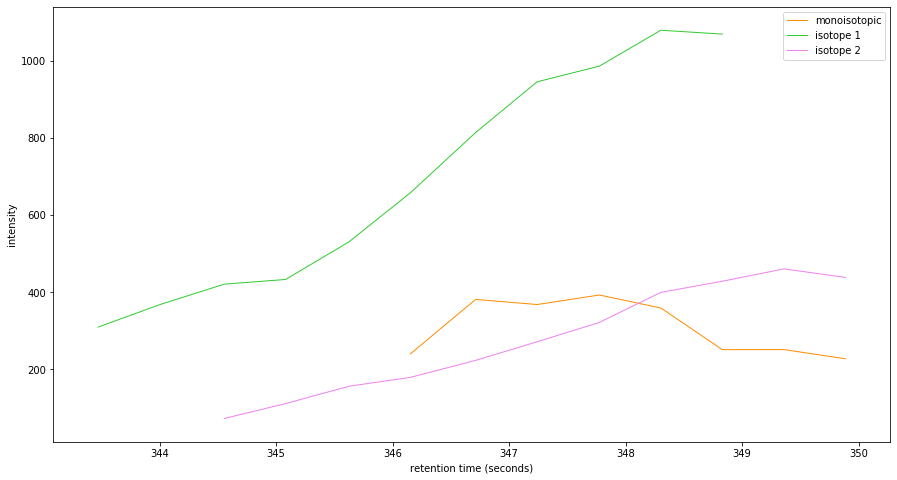

In [133]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

# title = 'maximum inferred intensity by monoisotopic mass'
# plt.title(title)

ax.plot(mono_isolated_peak_df.x, mono_isolated_peak_df.filtered_intensity, marker='', color='darkorange', linestyle='-', lw=1, ms=30, alpha=1.0, label='monoisotopic')
ax.plot(isotope_1_isolated_peak_df.x, isotope_1_isolated_peak_df.filtered_intensity, marker='', color='limegreen', linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope 1')
ax.plot(isotope_2_isolated_peak_df.x, isotope_2_isolated_peak_df.filtered_intensity, marker='', color='violet', linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope 2')

plt.legend(loc='best')
plt.xlabel('retention time (seconds)')
plt.ylabel('intensity')

plt.show()

In [134]:
selected_sequence_s.rt_isotope_correlation, selected_sequence_s.rt_isotope_cv

(0.9999999702192202, 0.0018904845486103473)

In [135]:
isotope_intensities_df = pd.DataFrame(selected_sequence_attribs_s.isotope_intensities_l, columns=['summed_intensity','saturated','inferred_intensity','inferred','isotope_points','isotope_apex_points'])


In [136]:
isotope_intensities_df

,summed_intensity,saturated,inferred_intensity,inferred,isotope_points,isotope_apex_points
0,234.0,False,234.0,False,"[[609.8096501919711, 707.0, 3296.0, 348.829877...","[[609.8096501919711, 712.0, 3276.0, 346.712537..."
1,413.0,False,413.0,False,"[[610.3092974577588, 699.0, 3291.0, 348.302045...","[[610.3131714916155, 714.0, 3281.0, 347.239681..."
2,92.0,False,92.0,False,"[[610.8130249608281, 703.0, 3296.0, 348.829877...","[[610.8130249608281, 711.0, 3286.0, 347.774447..."


In [137]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

not enough points to filter
not enough points to filter
not enough points to filter


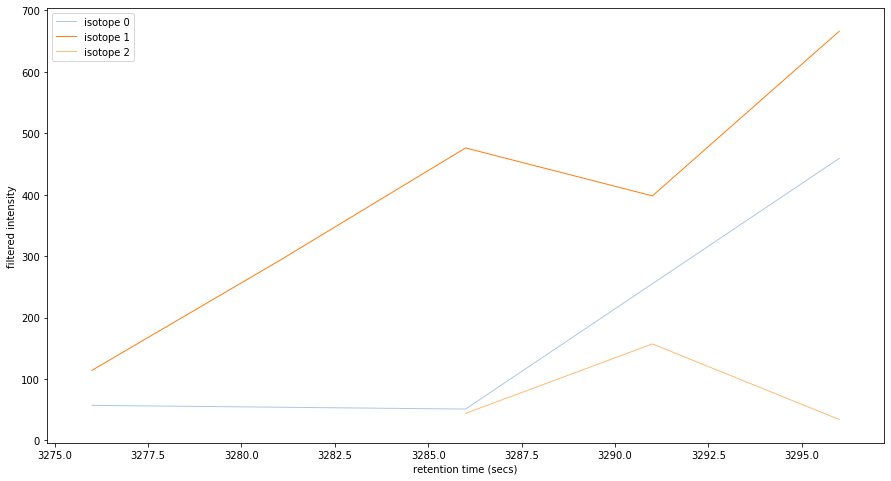

In [139]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

# title = 'maximum inferred intensity by monoisotopic mass'
# plt.title(title)

window_length = 11
isotopes_l = []
for isotope_idx,row in enumerate(isotope_intensities_df[:3].itertuples()):
    isotope_points_df = pd.DataFrame(row.isotope_points, columns=['mz','scan','frame_id','retention_time_secs','intensity'])
    flat_df = isotope_points_df.groupby(['frame_id'], as_index=False).intensity.sum()
    flat_df.sort_values(by=['frame_id'], ascending=True, inplace=True)
    flat_df['filtered_intensity'] = flat_df.intensity  # set the default
    if len(flat_df) > window_length:
        flat_df['filtered_intensity'] = signal.savgol_filter(flat_df.intensity, window_length=window_length, polyorder=3)
    else:
        print("not enough points to filter")
    isotopes_l.append(flat_df)
    ax.plot(flat_df.frame_id, flat_df.filtered_intensity, marker='', color=tableau20[isotope_idx+1 % len(tableau20)], linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope {}'.format(isotope_idx))

plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('filtered intensity')

plt.show()

not enough points to filter
not enough points to filter


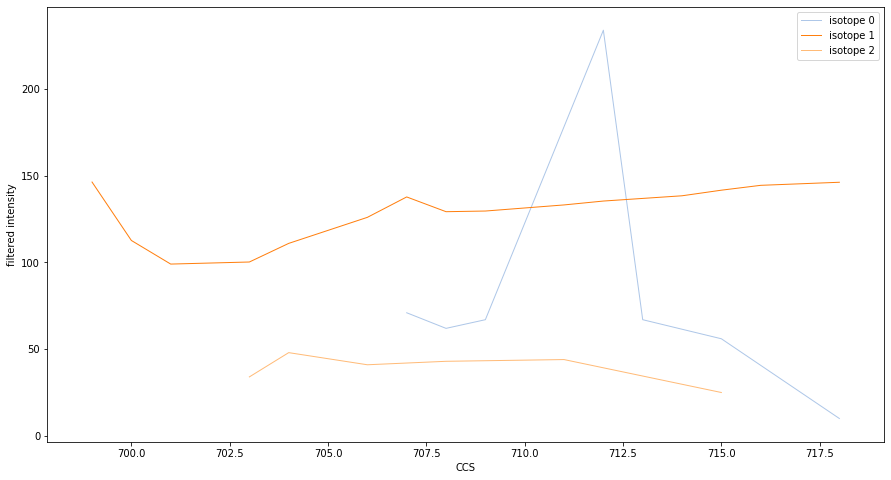

In [138]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

# title = 'maximum inferred intensity by monoisotopic mass'
# plt.title(title)

window_length = 11
isotopes_l = []
for isotope_idx,row in enumerate(isotope_intensities_df[:3].itertuples()):
    isotope_points_df = pd.DataFrame(row.isotope_points, columns=['mz','scan','frame_id','retention_time_secs','intensity'])
    flat_df = isotope_points_df.groupby(['scan'], as_index=False).intensity.sum()
    flat_df.sort_values(by=['scan'], ascending=True, inplace=True)
    flat_df['filtered_intensity'] = flat_df.intensity  # set the default
    if len(flat_df) > window_length:
        flat_df['filtered_intensity'] = signal.savgol_filter(flat_df.intensity, window_length=window_length, polyorder=3)
    else:
        print("not enough points to filter")
    isotopes_l.append(flat_df)
    ax.plot(flat_df.scan, flat_df.filtered_intensity, marker='', color=tableau20[isotope_idx+1 % len(tableau20)], linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope {}'.format(isotope_idx))

plt.legend(loc='best')
plt.xlabel('CCS')
plt.ylabel('filtered intensity')

plt.show()

In [121]:
selected_sequence_s.scan_isotope_correlation, selected_sequence_s.scan_isotope_cv

(-0.37251830384695156, 0.047452553159597406)